In [97]:
import pandas as pd
from pathlib import Path

In [98]:
# Save file path to variable
merged_csv = Path("/Users/jayp/Documents/project1_group4/merged.csv")

# Read with Pandas
merged_df = pd.read_csv(merged_csv)
merged_df.head()

/var/folders/d0/60frg1c91sn7mq03h1fy1nk00000gn/T/ipykernel_63381/3199735846.py:5: DtypeWarning: Columns (97) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv(merged_csv)


,UNITID,CIPCODE,MAJORNUM,Award Level,XCTOTALT,Total,XCTOTALM,Male,XCTOTALW,Women,...,inst_cbsatype,inst_countycd,inst_longitud,inst_latitude,ownnear_CBSACode,ownnear_CBSATitle,ownnear_geo_licode,ownnear_geo_text,ownnear_metro,ownnear_distance
0,100654.0,1.0999,1.0,5.0,R,9.0,R,1.0,R,8.0,...,Metropolitan Statistical Area,"Madison County, AL",-86.568504,34.783367,26620.0,"Huntsville, AL","Huntsville, Alabama Area","Huntsville, Alabama Area",1.0,NaN
1,100654.0,1.1001,1.0,5.0,R,10.0,R,5.0,R,5.0,...,Metropolitan Statistical Area,"Madison County, AL",-86.568504,34.783367,26620.0,"Huntsville, AL","Huntsville, Alabama Area","Huntsville, Alabama Area",1.0,NaN
2,100654.0,1.1001,1.0,7.0,R,6.0,Z,0.0,R,6.0,...,Metropolitan Statistical Area,"Madison County, AL",-86.568504,34.783367,26620.0,"Huntsville, AL","Huntsville, Alabama Area","Huntsville, Alabama Area",1.0,NaN
3,100654.0,1.1001,1.0,17.0,R,4.0,R,1.0,R,3.0,...,Metropolitan Statistical Area,"Madison County, AL",-86.568504,34.783367,26620.0,"Huntsville, AL","Huntsville, Alabama Area","Huntsville, Alabama Area",1.0,NaN
4,100654.0,1.9999,1.0,5.0,R,6.0,R,2.0,R,4.0,...,Metropolitan Statistical Area,"Madison County, AL",-86.568504,34.783367,26620.0,"Huntsville, AL","Huntsville, Alabama Area","Huntsville, Alabama Area",1.0,NaN


In [ ]:
#1.what are the top 5 universities with the most black, asian or hispanic students for each year?
#2.How many degrees awarded were awarded to black, asian or hispanic students from the top 5 universties?
#3.How many students Black,Hispanic, or Asian students are enrolled each year in the top 5 universities?

In [99]:
columns_names = ["instnm", "Year","XCTOTALM", "Black Total", "Asian Total", "Hispanic Total"]

In [100]:
#Question 1
merged_df[columns_names]

,instnm,Year,XCTOTALM,Black Total,Asian Total,Hispanic Total
0,Alabama A & M University,2021.0,R,4.0,0.0,0.0
1,Alabama A & M University,2021.0,R,9.0,0.0,0.0
2,Alabama A & M University,2021.0,Z,5.0,0.0,0.0
3,Alabama A & M University,2021.0,R,1.0,0.0,0.0
4,Alabama A & M University,2021.0,R,4.0,0.0,0.0
...,...,...,...,...,...,...
296464,Flagler College-Tallahassee,NaN,NaN,NaN,NaN,NaN
296465,Doane College-Lincoln Grand Island and Master,NaN,NaN,NaN,NaN,NaN
296466,University of South Florida-St. Petersburg Campus,NaN,NaN,NaN,NaN,NaN
296467,Averett University-Non-Traditional Programs,NaN,NaN,NaN,NaN,NaN


In [101]:
merged_df = merged_df.groupby(['instnm', 'Year']).agg({
    'Black Total': 'sum',
    'Asian Total': 'sum',
    'Hispanic Total': 'sum'
}).reset_index()

# Calculating the total number of students from each racial/ethnic group
merged_df['Total'] = merged_df['Black Total'] + merged_df['Asian Total'] + merged_df['Hispanic Total']

# Sorting universities based on the total number of students from each racial/ethnic group for each year
top_5_universities_per_year = merged_df.groupby('Year').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

print(top_5_universities_per_year)

                             instnm    Year  Black Total  Asian Total  \
0                Miami Dade College  2021.0       4798.0        388.0   
1  Florida International University  2021.0       4462.0        996.0   
2        Valencia Community College  2021.0       5456.0       1634.0   
3                 El Centro College  2021.0       5182.0       2292.0   
4      Western Governors University  2021.0       7046.0       3900.0   

   Hispanic Total    Total  
0         24530.0  29716.0  
1         23242.0  28700.0  
2         12690.0  19780.0  
3         11806.0  19280.0  
4          7984.0  18930.0  


/var/folders/d0/60frg1c91sn7mq03h1fy1nk00000gn/T/ipykernel_63381/2937313502.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_universities_per_year = merged_df.groupby('Year').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)


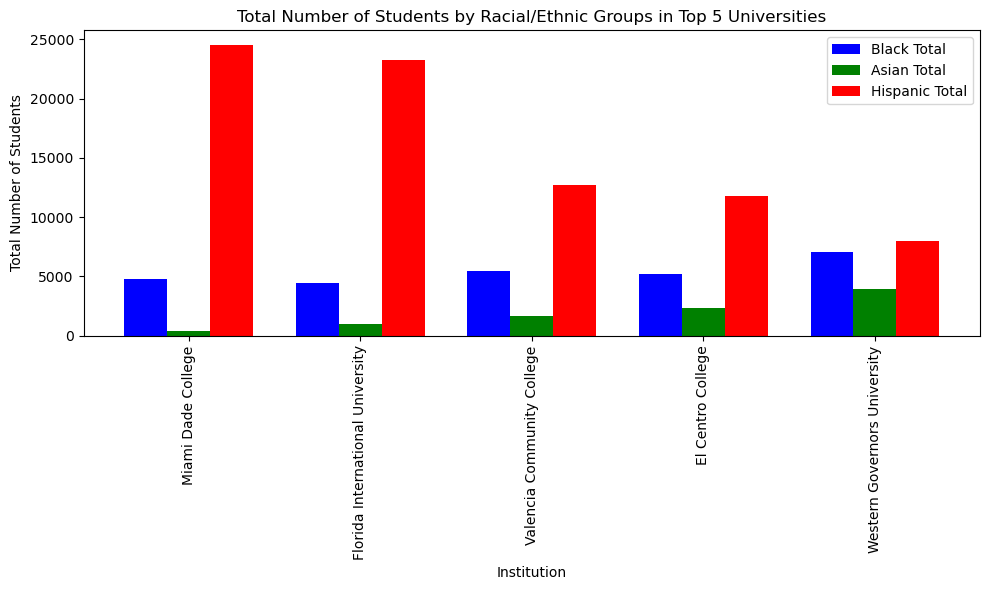

In [116]:
import matplotlib.pyplot as plt

# Data from the DataFrame
institutions = df['instnm']
black_students = df['Black Total']
asian_students = df['Asian Total']
hispanic_students = df['Hispanic Total']

# Number of institutions
num_institutions = len(institutions)

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
index = range(num_institutions)

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(index, black_students, color='b', width=bar_width, label='Black Total')
plt.bar([i + bar_width for i in index], asian_students, color='g', width=bar_width, label='Asian Total')
plt.bar([i + 2 * bar_width for i in index], hispanic_students, color='r', width=bar_width, label='Hispanic Total')

# Adding labels and title
plt.xlabel('Institution')
plt.ylabel('Total Number of Students')
plt.title('Total Number of Students by Racial/Ethnic Groups in Top 5 Universities')
plt.xticks([i + bar_width for i in index], institutions, rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [108]:
#Question 2

# Assuming your DataFrame is named df
# Filter the DataFrame to include only relevant columns
filtered_df = df[['Year', 'Black Total', 'Asian Total', 'Hispanic Total']]

# Group the DataFrame by year and sum the total number of degrees awarded to each racial/ethnic group
degrees_awarded_by_year = filtered_df.groupby('Year').sum()

# Display the result
print(degrees_awarded_by_year)


Total Black Students in Top 5 Universities: 26944
Total Asian Students in Top 5 Universities: 9210
Total Hispanic Students in Top 5 Universities: 80252


/var/folders/d0/60frg1c91sn7mq03h1fy1nk00000gn/T/ipykernel_63381/2873267106.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Year').apply(lambda x: x.nlargest(5, group))
/var/folders/d0/60frg1c91sn7mq03h1fy1nk00000gn/T/ipykernel_63381/2873267106.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Year').apply(lambda x: x.nlargest(5, group))
/var/folders/d0/60frg1c9

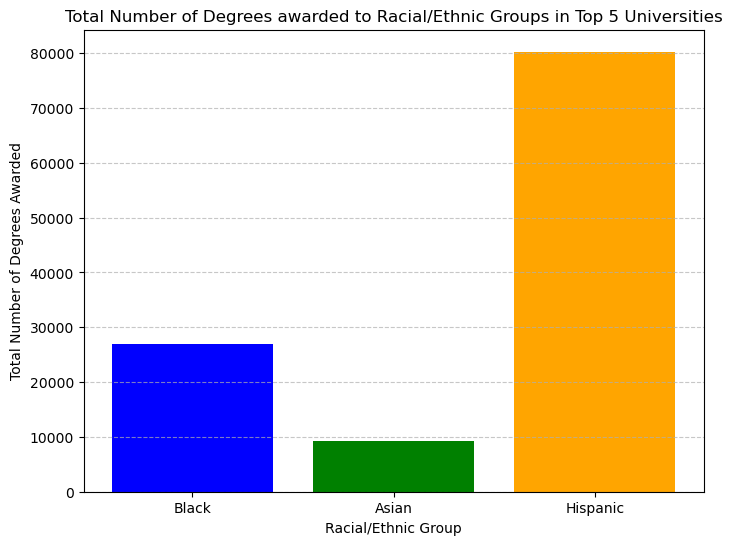

In [114]:
import matplotlib.pyplot as plt

# Total number of students by racial/ethnic group in the top 5 universities
total_black_students = 26944
total_asian_students = 9210
total_hispanic_students = 80252

# Data for the bar graph
ethnicities = ['Black', 'Asian', 'Hispanic']
total_students = [total_black_students, total_asian_students, total_hispanic_students]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(ethnicities, total_students, color=['blue', 'green', 'orange'])
plt.xlabel('Racial/Ethnic Group')
plt.ylabel('Total Number of Degrees Awarded')
plt.title('Total Number of Degrees awarded to Racial/Ethnic Groups in Top 5 Universities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [84]:
#Question 3

# Grouping by university, year, and racial/ethnic group and summing up the total number of students
merged_df = merged_df.groupby(['instnm', 'Year']).agg({
    'Black Total': 'sum',
    'Asian Total': 'sum',
    'Hispanic Total': 'sum'
}).reset_index()

# Calculating the total number of students from each racial/ethnic group
merged_df['Total'] = merged_df['Black Total'] + merged_df['Asian Total'] + merged_df['Hispanic Total']

# Defining a function to get the top 5 universities for each racial/ethnic group per year
def top_5_universities(df, group):
    return df.groupby('Year').apply(lambda x: x.nlargest(5, group))

# Getting the top 5 universities for each racial/ethnic group per year
top_5_black = top_5_universities(merged_df, 'Black Total')
top_5_asian = top_5_universities(merged_df, 'Asian Total')
top_5_hispanic = top_5_universities(merged_df, 'Hispanic Total')

# Summing up the total number of students from each racial/ethnic group within the top 5 universities
total_black = top_5_black['Black Total'].sum()
total_asian = top_5_asian['Asian Total'].sum()
total_hispanic = top_5_hispanic['Hispanic Total'].sum()

print("Total Black Students in Top 5 Universities:", total_black)
print("Total Asian Students in Top 5 Universities:", total_asian)
print("Total Hispanic Students in Top 5 Universities:", total_hispanic)

Total Black Students in Top 5 Universities: 37632.0
Total Asian Students in Top 5 Universities: 38174.0
Total Hispanic Students in Top 5 Universities: 84586.0


/var/folders/d0/60frg1c91sn7mq03h1fy1nk00000gn/T/ipykernel_63381/1843030402.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Year').apply(lambda x: x.nlargest(5, group))
/var/folders/d0/60frg1c91sn7mq03h1fy1nk00000gn/T/ipykernel_63381/1843030402.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Year').apply(lambda x: x.nlargest(5, group))
/var/folders/d0/60frg1c9

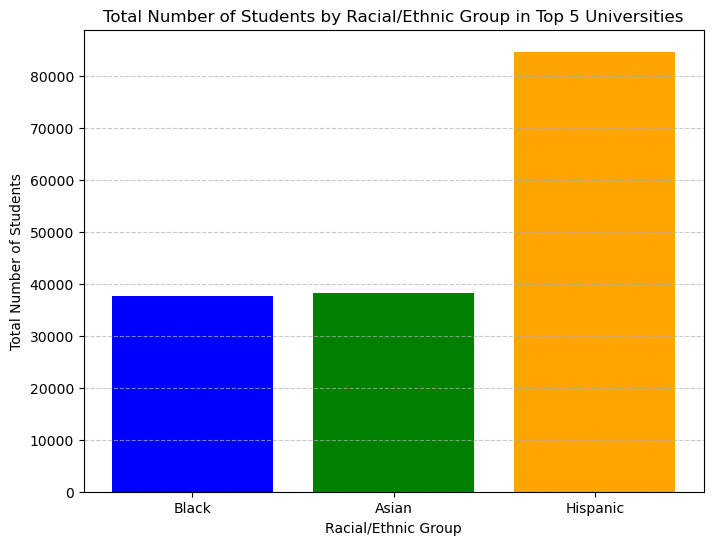

In [91]:
import matplotlib.pyplot as plt

# Total number of students by racial/ethnic group in the top 5 universities
total_black_students = total_black
total_asian_students = total_asian
total_hispanic_students = total_hispanic

# Data for the bar graph
ethnicities = ['Black', 'Asian', 'Hispanic']
total_students = [total_black_students, total_asian_students, total_hispanic_students]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(ethnicities, total_students, color=['blue', 'green', 'orange'])
plt.xlabel('Racial/Ethnic Group')
plt.ylabel('Total Number of Students')
plt.title('Total Number of Students by Racial/Ethnic Group in Top 5 Universities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
for i in sorted(merged_df.columns):
    print (i)

2+ Races
2+ Races Female
2+ Races Male
American Indian Female
American Indian Male
American Indian Tot
Asian Female
Asian Male
Asian Total
AssocCat
Award Level
BaccCat
Black Female
Black Male
Black Total
CIPCODE
CIPNM
GradCat
Hispanic Female
Hispanic Male
Hispanic Total
MAJORNUM
Male
Native Hawaiian Female
Native Hawaiian Male
Native Hawaiian Total
Non-Resident Alien Female 
Non-Resident Alien Male
Non-Resident Alien Total
Total
UNITID
Unknown Female
Unknown Male
Unknown Total
White Female
White Male
White Total
Women
XC2MORM
XC2MORT
XC2MORW
XCAIANM
XCAIANT
XCAIANW
XCASIAM
XCASIAT
XCASIAW
XCBKAAM
XCBKAAT
XCBKAAW
XCHISPM
XCHISPT
XCHISPW
XCNHPIM
XCNHPIT
XCNHPIW
XCNRALM
XCNRALT
XCNRALW
XCTOTALM
XCTOTALT
XCTOTALW
XCUNKNM
XCUNKNT
XCUNKNW
XCWHITM
XCWHITT
XCWHITW
Year
avginstate
avgmktwage
avgtotfrosh
barrons
deg1count
deg2count
deg3count
deg4count
deg5count
deg6count
degtotcount
dfrcgid
dfrcuscg
distance_w
fteug10to18
gr_grads_1
gr_grads_10
gr_grads_5
gr_instate_1
gr_instate_10
gr_instate_5


In [ ]:
#instm = instution name
#Races = American Indian (M/F) , Asian (M/F), Hispanic (M/F), Native Hawaiian (M/F), White (M/F), Black (M/F), 2+ Races (M/F)